In [2]:
!pip install fredapi

<ipython-input-3-f54ebcf773c6>:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


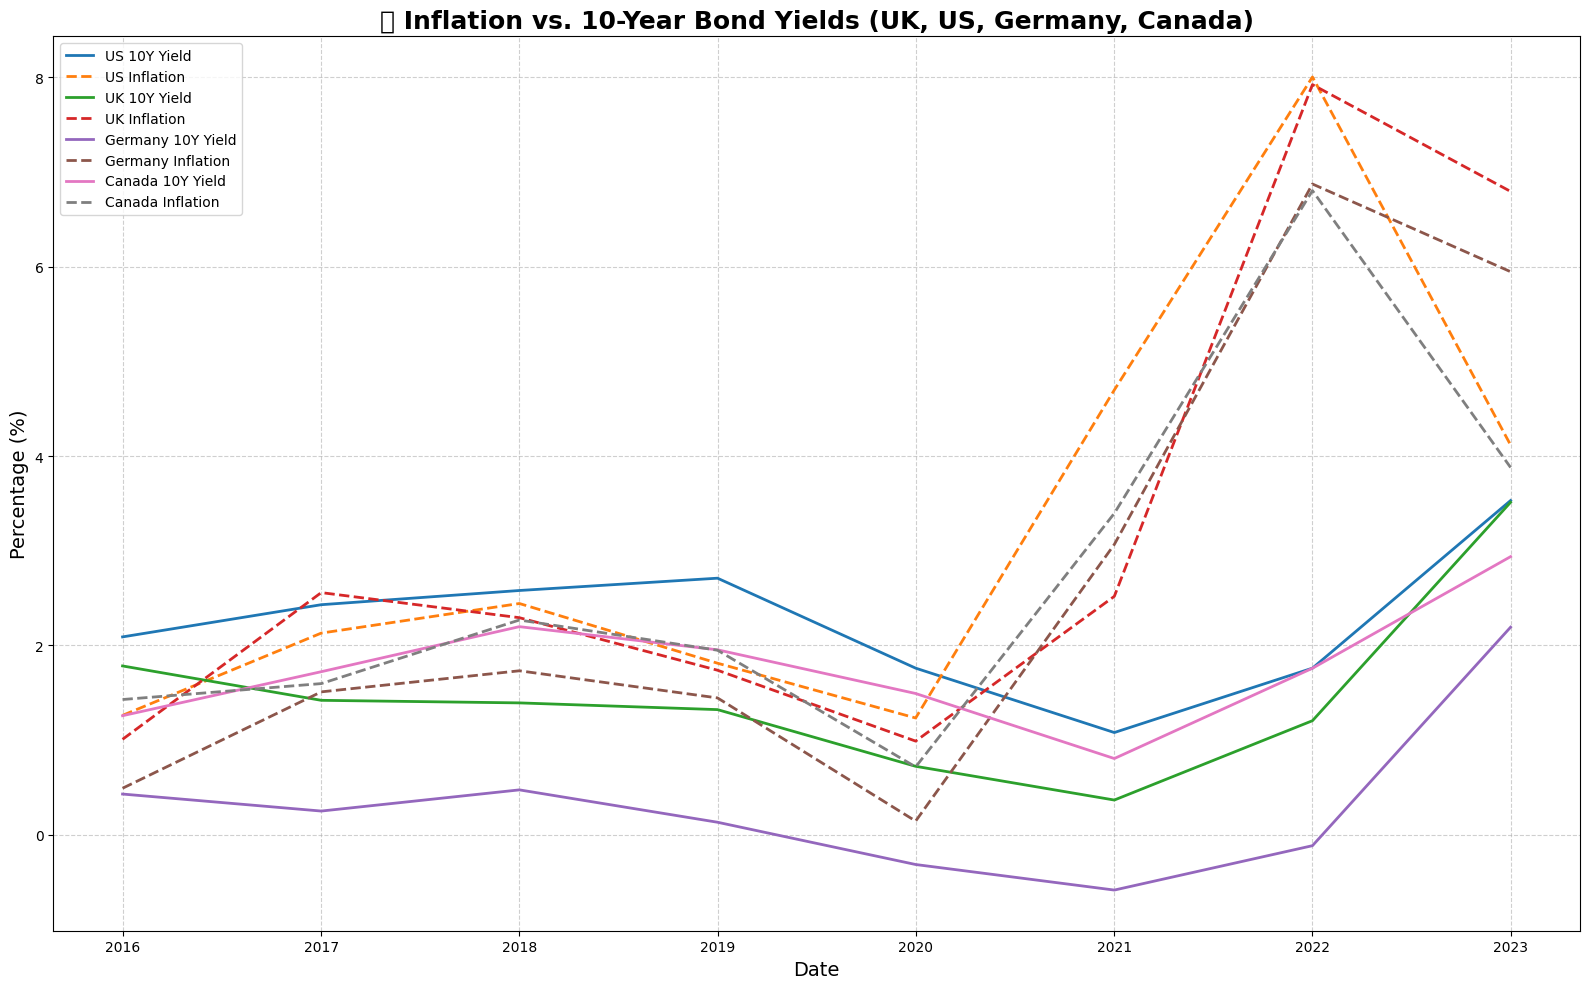

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from fredapi import Fred

# Step 2: Initialize FRED API
fred = Fred(api_key='9f6b3c52c58b1abc1cfceed0a1417b9e')  # Replace with your valid FRED API key

# Set date range (last 10 years for better context)
end_date = datetime.today()
start_date = end_date - timedelta(days=10 * 365)

# --- FRED Series Codes ---

# 10-Year Government Bond Yields
bond_yields = {
    'US': 'IRLTLT01USM156N',
    'UK': 'IRLTLT01GBM156N',
    'Germany': 'IRLTLT01DEM156N',
    'Canada': 'IRLTLT01CAM156N'
}

# Inflation (CPI Year-over-Year or Inflation Rate)
inflation = {
    'US': 'FPCPITOTLZGUSA',
    'UK': 'FPCPITOTLZGGBR',
    'Germany': 'FPCPITOTLZGDEU',
    'Canada': 'FPCPITOTLZGCAN'
}

# --- Fetch Data ---
data = {}
for country in bond_yields:
    yield_series = fred.get_series(bond_yields[country], observation_start=start_date)
    infl_series = fred.get_series(inflation[country], observation_start=start_date)

    yield_df = yield_series.reset_index()
    infl_df = infl_series.reset_index()

    yield_df.columns = ['Date', f'{country}_10Y_Yield']
    infl_df.columns = ['Date', f'{country}_Inflation']

    merged = pd.merge(yield_df, infl_df, on='Date', how='inner')
    data[country] = merged

# --- Plotting ---
plt.figure(figsize=(16, 10))
for country, df in data.items():
    plt.plot(df['Date'], df[f'{country}_10Y_Yield'], label=f'{country} 10Y Yield', linewidth=2)
    plt.plot(df['Date'], df[f'{country}_Inflation'], label=f'{country} Inflation', linestyle='--', linewidth=2)

plt.title("📊 Inflation vs. 10-Year Bond Yields (UK, US, Germany, Canada)", fontsize=18, weight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
